### confidence interval

In [6]:
install.packages("binom", repos='http://cran.us.r-project.org')

Installing package into 'C:/R/library'
(as 'lib' is unspecified)


package 'binom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sébastien\AppData\Local\Temp\RtmpiOFd5f\downloaded_packages


In [7]:
library(binom)

In [8]:
binom.confint(3, 10, method="all")

method,x,n,mean,lower,upper
agresti-coull,3,10,0.3000000,0.10333842,0.6076747
asymptotic,3,10,0.3000000,0.01597423,0.5840258
bayes,3,10,0.3181818,0.07454423,0.5794516
cloglog,3,10,0.3000000,0.07113449,0.5778673
exact,3,10,0.3000000,0.06673951,0.6524529
logit,3,10,0.3000000,0.09976832,0.6236819
probit,3,10,0.3000000,0.08991347,0.6150429
profile,3,10,0.3000000,0.08470272,0.6065091
lrt,3,10,0.3000000,0.08458545,0.6065389
prop.test,3,10,0.3000000,0.08094782,0.6463293


In [9]:
binom.confint(300, 1000, method="all")

method,x,n,mean,lower,upper
agresti-coull,300,1000,0.3000000,0.2723966,0.3291341
asymptotic,300,1000,0.3000000,0.2715974,0.3284026
bayes,300,1000,0.3001998,0.2719448,0.3286787
cloglog,300,1000,0.3000000,0.2718595,0.3285966
exact,300,1000,0.3000000,0.2717211,0.3294617
logit,300,1000,0.3000000,0.2723865,0.3291466
probit,300,1000,0.3000000,0.2722277,0.3289871
profile,300,1000,0.3000000,0.2721340,0.3288893
lrt,300,1000,0.3000000,0.2721419,0.3289000
prop.test,300,1000,0.3000000,0.2719222,0.3296354


### correlation

In [1]:
data <- read.csv2('../data/smp1.csv')

In [2]:
head(data)

age,prof,dep.cons,scz.cons,grav.cons,n.enfant,rs,ed,dr
31,autre,0,0,1,2,2,1,1
49,NA,0,0,2,7,2,2,1
50,prof.intermediaire,0,0,2,2,2,3,2
47,ouvrier,0,0,1,0,2,2,2
23,sans emploi,1,0,2,1,2,2,2
34,ouvrier,0,0,1,3,1,2,1


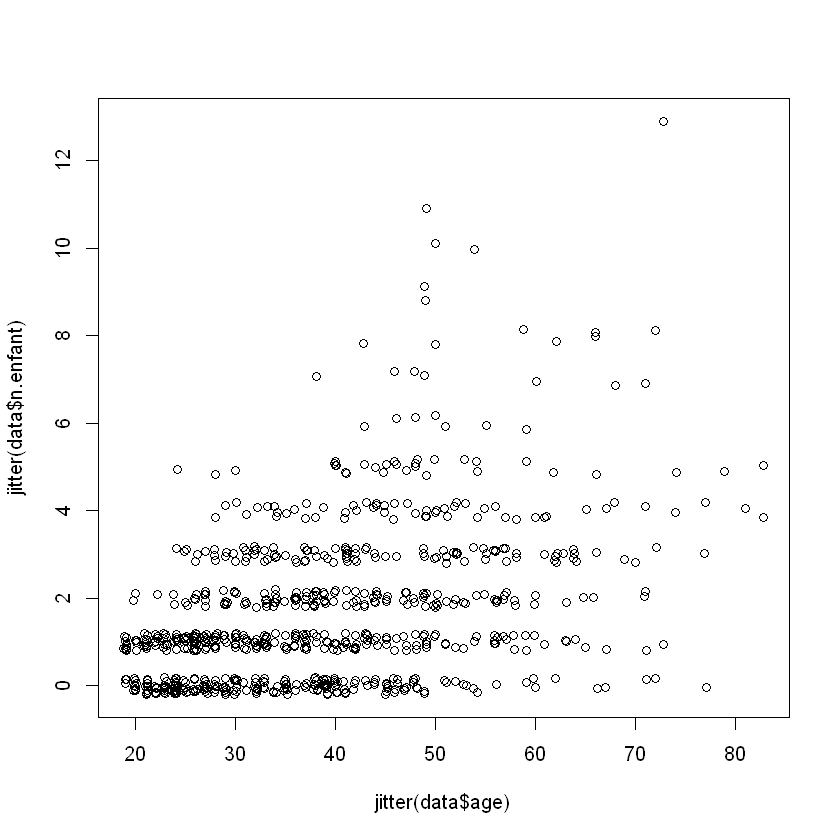

In [3]:
plot(jitter(data$age),
    jitter(data$n.enfant))

In [4]:
cor(data$age, data$n.enfant, use = 'complete.obs')

[1] 0.4326039

In [10]:
# Le pourcentage de variance partagé entre ces 2 variables est de 0.4326**2, soit
.4326**2

[1] 0.1871428

### relative risk and odds-ratio

In [13]:
install.packages("Epi", repos='http://cran.us.r-project.org')

Installing package into 'C:/R/library'
(as 'lib' is unspecified)
also installing the dependencies 'RcppArmadillo', 'cmprsk', 'etm', 'numDeriv', 'data.table', 'zoo'



package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'cmprsk' successfully unpacked and MD5 sums checked
package 'etm' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'Epi' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sébastien\AppData\Local\Temp\RtmpiOFd5f\downloaded_packages


In [12]:
library(Epi)

ERROR: Error in library(Epi): there is no package called 'Epi'


In [14]:
str(data)

'data.frame':	799 obs. of  9 variables:
 $ age      : int  31 49 50 47 23 34 24 52 42 45 ...
 $ prof     : Factor w/ 8 levels "agriculteur",..: 3 NA 7 6 8 6 3 2 6 6 ...
 $ dep.cons : int  0 0 0 0 1 0 1 0 1 0 ...
 $ scz.cons : int  0 0 0 0 0 0 0 0 0 0 ...
 $ grav.cons: int  1 2 2 1 2 1 5 1 5 5 ...
 $ n.enfant : int  2 7 2 0 1 3 5 2 1 2 ...
 $ rs       : int  2 2 2 2 2 1 3 2 3 2 ...
 $ ed       : int  1 2 3 2 2 2 3 2 3 2 ...
 $ dr       : int  1 1 2 2 2 1 2 2 1 2 ...


In [15]:
data$ed.b <- ifelse(data$ed >2, 1, 0)

In [16]:
table(data$ed.b, data$ed)

   
      1   2   3
  0 315 155   0
  1   0   0 222

In [17]:
library(Epi)

In [18]:
twoby2(1 - data$ed.b, 1 - data$dep.cons)

2 by 2 table analysis: 
------------------------------------------------------ 
Outcome   : 0 
Comparing : 0 vs. 1 

    0   1    P(0) 95% conf. interval
0 126  96  0.5676    0.5016   0.6312
1 135 335  0.2872    0.2481   0.3298

                                   95% conf. interval
             Relative Risk: 1.9760    1.6456   2.3726
         Sample Odds Ratio: 3.2569    2.3361   4.5408
Conditional MLE Odds Ratio: 3.2508    2.3037   4.6035
    Probability difference: 0.2803    0.2020   0.3549

             Exact P-value: 0 
        Asymptotic P-value: 0 
------------------------------------------------------
